# **Project: Loan approval prediction**

# Building a machine learning model to predict whether a loan applicant will be approved for a loan or not based on their personal and financial information

# **Introduction**

The focus of this project is to analyze the key factors impacting loan approval status and create a reliable model that accurately predicts loan approval with utmost precision. This predictive model can greatly aid financial institutions in streamlining their loan approval process and increasing efficiency. The main aim is to identify the vital factors associated with loan approval and establish a correlation between these factors, increasing the predictability of loan approval outcomes. The end goal is to develop a highly accurate model capable of predicting loan approval status, benefiting both financial organizations and loan applicants.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Loading dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/train.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**Data Cleaning**

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.dropna(inplace =True)

Let's check the Missing values for the final time!

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Exploring Data**

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


**Replacing the Variable values to Numeric Value**

In [ ]:
df['Loan_Status'].replace('Y',1,inplace=True)
df['Loan_Status'].replace('N',0,inplace=True)
df['Loan_Status'].value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

In [ ]:
df['Loan_Status']

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [ ]:
df.Gender=df.Gender.map({'Male':1,'Female':0})
df['Gender'].value_counts()

1    394
0     86
Name: Gender, dtype: int64

In [ ]:
df.Married=df.Married.map({'Yes':1,'No':0})
df['Married'].value_counts()

1    311
0    169
Name: Married, dtype: int64

In [ ]:
df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df['Dependents'].value_counts()

0    274
2     85
1     80
3     41
Name: Dependents, dtype: int64

In [ ]:
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})
df['Education'].value_counts()

1    383
0     97
Name: Education, dtype: int64

In [ ]:
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})
df['Self_Employed'].value_counts()

0    414
1     66
Name: Self_Employed, dtype: int64

In [ ]:
df.Property_Area=df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
df['Property_Area'].value_counts()

1    191
2    150
0    139
Name: Property_Area, dtype: int64

**Exploratory Data Analyis**

<Axes: xlabel='Property_Area', ylabel='count'>

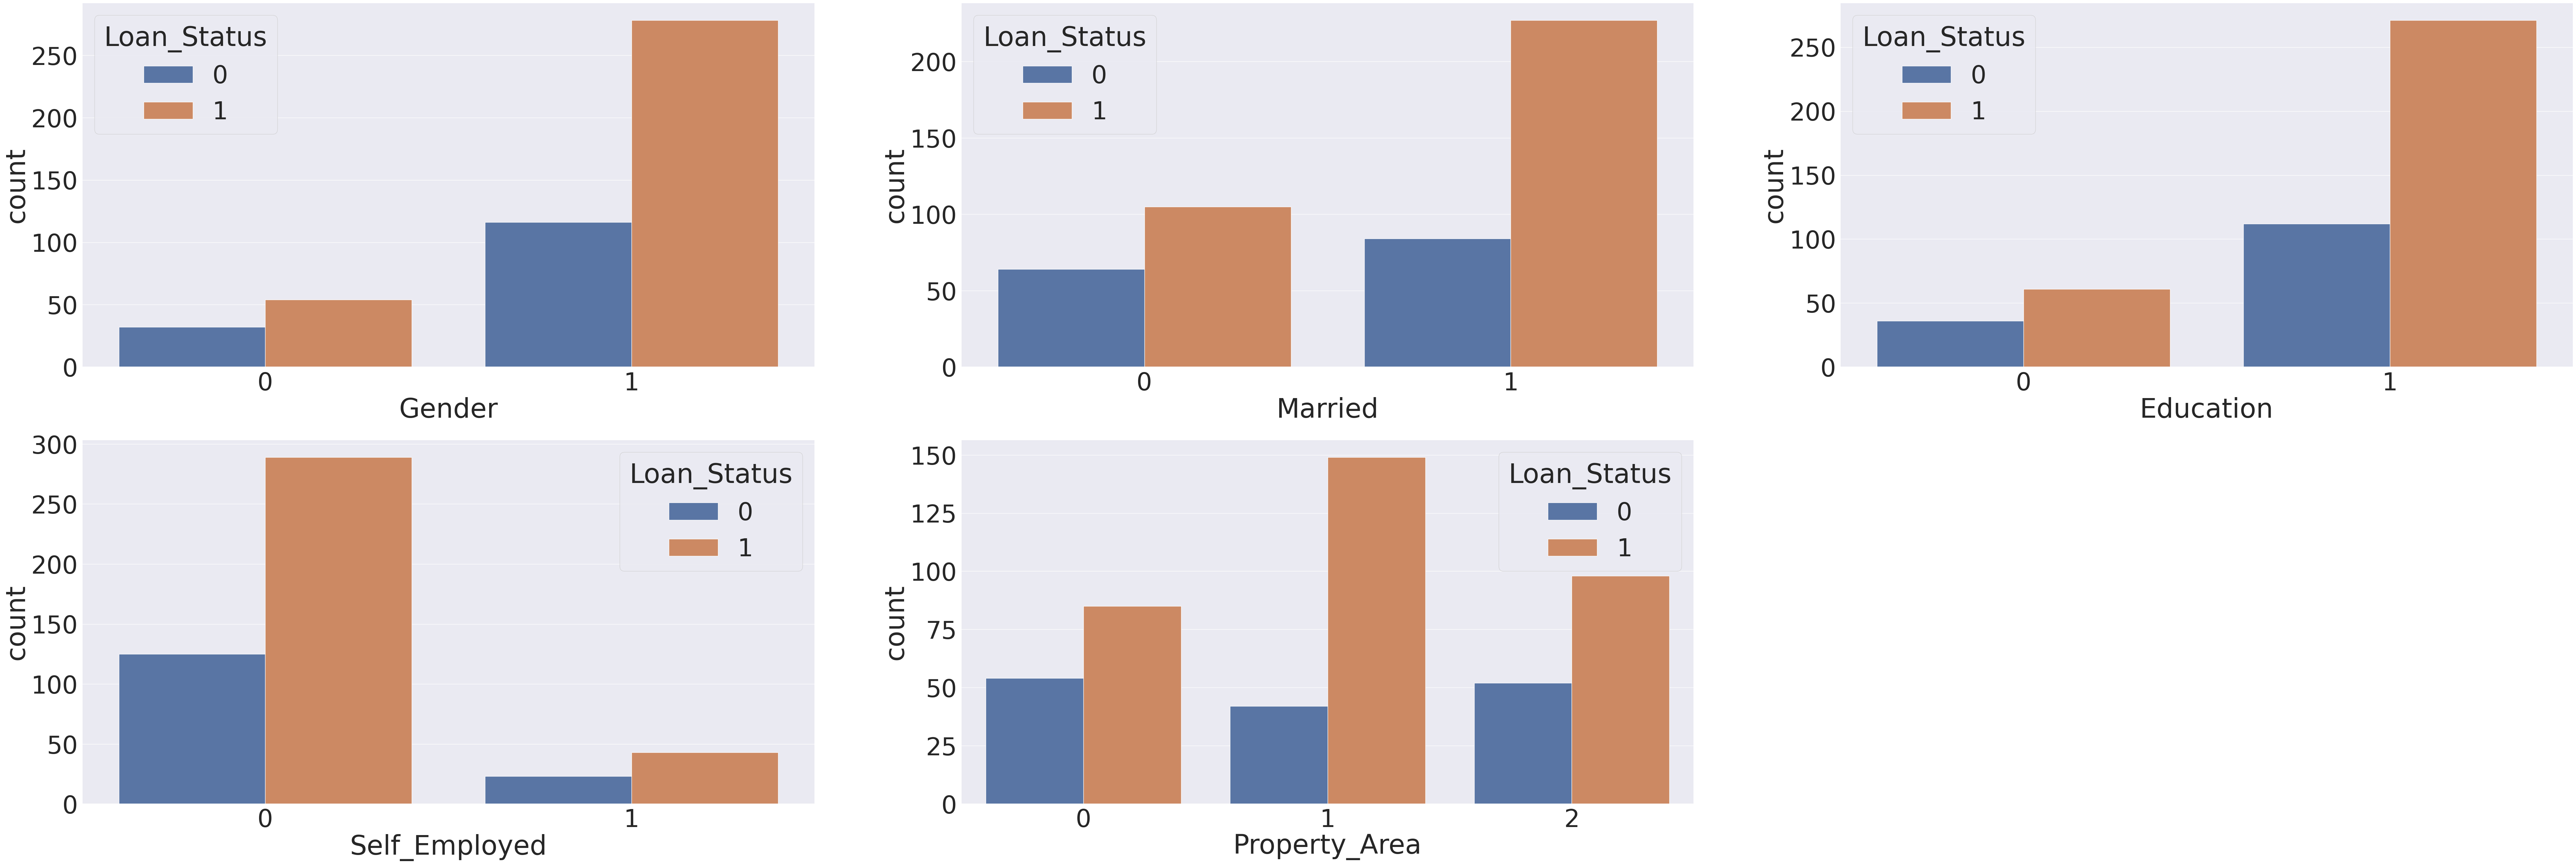

In [ ]:
plt.figure(figsize = (100, 50))
sns.set(font_scale = 5)

plt.subplot(331)
sns.countplot(data=df, x='Gender', hue='Loan_Status')

plt.subplot(332)
sns.countplot(data = df, x = 'Married',hue='Loan_Status')

plt.subplot(333)
sns.countplot(data = df, x = 'Education',hue='Loan_Status')

plt.subplot(334)
sns.countplot(data = df, x = 'Self_Employed',hue='Loan_Status')

plt.subplot(335)
sns.countplot(data = df, x = 'Property_Area',hue='Loan_Status')

**Final Database**

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


**Importing Packages for Classification algorithms**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

**Splitting the data into Train and Test set**

In [ ]:
X = df.iloc[1:542,1:12].values
y = df.iloc[1:542,12].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [ ]:
X_train

array([[  1.,   1.,   0., ..., 360.,   1.,   1.],
       [  1.,   1.,   1., ..., 360.,   1.,   2.],
       [  0.,   0.,   0., ..., 480.,   1.,   0.],
       ...,
       [  1.,   1.,   2., ..., 360.,   1.,   0.],
       [  1.,   1.,   3., ..., 360.,   1.,   2.],
       [  1.,   1.,   2., ..., 360.,   1.,   1.]])

**Training Model using  Logistic Regression**

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)

lr_prediction = model.predict(X_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(lr_prediction,y_test))

Logistic Regression accuracy =  0.84375


In [ ]:
print("y_predicted",lr_prediction)
print("y_test",y_test)

y_predicted [0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]
y_test [0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1]


**CONCLUSION**

1. The Loan Status is heavily dependent on the Credit History for Predictions.
2. The Logistic Regression algorithm gives us the maximum Accuracy (84% approx) compared to the other Machine Learning Classification Algorithms.